In [66]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import scipy
import sklearn

In [220]:
contents = open("data/(1) The Hunger Games.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(2) Catching Fire.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(3.1) Mockingjay.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(3.2) Mockingjay.txt", "r", encoding='utf-8').read()

In [221]:
sentences = contents.lower().replace("\r\n", " ").replace("\r", " ").replace("\n", " ").replace(';', ' ').replace(',', ' ').replace('?', ' ').replace('"', ' ').replace("'", ' ').replace(":", ' ').replace("*", ' ').replace("#", ' ').replace("[", ' ').replace("]", ' ').replace("-", ' ').split(".")

In [258]:
# create dictionary
dictionary = []
tmp_dictionary = {}
#words_vector = new array()
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    for word in words:
        if len(word.strip()) > 0:
            if word not in tmp_dictionary:
                tmp_dictionary[word] = 0
            tmp_dictionary[word] += 1

# keep only frequent words occurences
for word in tmp_dictionary:
    if tmp_dictionary[word] > 200 and len(word) > 1:
        dictionary.append(word)
        
print(len(dictionary))

193


In [259]:
# get vector dimensions
tmp_vector_dimensions = {}
vector_dimensions = []
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension not in tmp_vector_dimensions:
                tmp_vector_dimensions[dimension] = 0
            tmp_vector_dimensions[dimension] += 1
            prev_word = word
            
# keep only frequent dimensions occurences
for dimension in tmp_vector_dimensions:
    if tmp_vector_dimensions[dimension] > 0:
        vector_dimensions.append(dimension)

print(len(vector_dimensions))

60752


In [260]:
# create vector
vector = np.zeros((len(dictionary), len(vector_dimensions)))

for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension in vector_dimensions:
                vector[dictionary.index(word), vector_dimensions.index(dimension)] += 1

In [261]:
#reduce dimensions
pca = PCA(n_components = 2)
vector_2D = pca.fit_transform(vector)

pca = PCA(n_components = 100)
vector_100D = pca.fit_transform(vector)

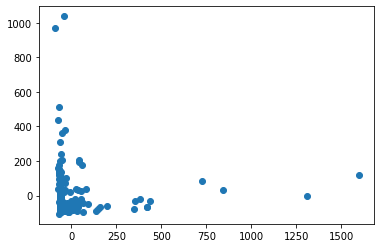

In [262]:
#plot data
plt.scatter(vector_2D[:,0], vector_2D[:,1])
plt.show()

In [263]:
# compute distance matric
dist_matrix = sklearn.metrics.pairwise.euclidean_distances(vector)

In [264]:
xxx = np.argmin(np.where(dist_matrix == 0, 9999, dist_matrix), axis=1)
i = 0;
for x in xxx:
    w1 = dictionary[i]
    w2 = dictionary[x]
    dist = dist_matrix[dictionary.index(w1), dictionary.index(w2)]
    print(w1 + " - " + w2 + " - " + str(dist))
    i += 1

games - arena - 20.12461179749811
the - first - 911.5190617864225
tributes - things - 35.185224171518364
when - if - 166.21672599350524
up - down - 175.03713891628828
other - plutarch - 46.95742752749558
of - in - 490.33661906898203
is - off - 147.61097520171052
my - his - 367.6139279189514
out - one - 262.88780877020525
but - when - 250.37771466326632
only - than - 73.76313442364011
she - who - 171.74690681348528
must - would - 56.824290580701486
have - trying - 266.668333328125
had - got - 61.61980201201558
and - but - 394.93796981298215
in - of - 490.33661906898203
with - for - 142.38679714074615
our - their - 37.44329045369811
mother - cinna - 45.58508528016593
did - maybe - 54.85435260760991
this - voice - 206.9009424821453
day - moment - 20.83266665599966
myself - head - 41.47288270665544
on - from - 395.84340338068034
one - think - 138.3654581172628
enough - way - 64.52906321960671
to - on - 675.4176485701273
see - around - 81.4555093287127
them - us - 61.96773353931867
little -

In [233]:
dist_matrix[dictionary.index("five"), dictionary.index("four")]

2.7663306100449367